In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

# Dataset loading and basic exploration

In [2]:
water = pd.read_csv("data/water_potability.csv")
water.shape

(3276, 10)

In [3]:
water.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
water.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

## Finding the two most correlated attributes

In [5]:
most_correlated_attr = "attribute_name_here"
correlation_matrix = water.corr()
for attr in correlation_matrix:
    max_corr = 0
    idx = 0
    for value in correlation_matrix[attr]:
        if value != 1 and abs(value) > abs(max_corr):
            max_corr = value
            # get the name of the most correlated attribute
            most_correlated_attr = list(water.columns)[idx]
        idx+=1
    print(attr, most_correlated_attr, max_corr)

ph Solids -0.08928825011982429
Hardness Sulfate -0.10692345399851362
Solids Sulfate -0.17180427470199292
Chloramines Solids -0.07014757983260811
Sulfate Solids -0.17180427470199292
Conductivity Hardness -0.023914599662821827
Organic_carbon ph 0.04350334128238972
Trihalomethanes Sulfate -0.03027406187757645
Turbidity ph -0.03905666613664019
Potability Solids 0.03374331339365026


In [6]:
# long computation
water_profile = ProfileReport(df=water, title="Analysis of the water dataframe", explorative=True)
water_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Missing values

Discussed in the presentation.
Only 3 attributes have missing values:
- `ph` - 491
- `Sulfate` - 781
- `Trihalomethanes` - 162

Number of attributes with given number of missing values in its description:

- 0: 2011
- 1: 1105
- 2: 151
- 3: 9

# Dimensionality reduction
Principal Component Analysis

PCA can't handle missing values, so they must be removed

In [9]:
# removes all rows that have any missing values
water_no_missing = water.dropna(axis=0)

## Standardise the data

In [10]:
from sklearn.preprocessing import StandardScaler

potability = water_no_missing["Potability"]
water_data_no_missing = water_no_missing.drop(["Potability"], axis=1)
water_data_standardised = StandardScaler().fit(water_data_no_missing).transform(water_data_no_missing)

In [11]:
water_data_standardised[:3]

array([[ 0.7824658 ,  0.56411376,  0.01168692,  0.5838039 ,  0.57437811,
        -0.78396246,  1.22703167,  2.11165179,  0.84476056],
       [ 1.27546291, -0.45565257, -0.45583491, -0.37094728, -0.56048006,
        -0.34842885, -0.84215371, -2.14039865,  0.13503344],
       [-0.95483488, -0.23461412,  0.7906452 ,  0.25910357, -0.15891057,
        -1.81006276, -1.79234008, -0.7144228 , -1.80736621]])

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

water_pca = pca.fit(water_data_standardised).transform(water_data_standardised)
water_pca[:3]

array([[-0.89277496, -0.12034861],
       [-0.25428385, -0.28366897],
       [ 1.05212008,  0.52176466]])

In [13]:
for i,v in enumerate(pca.explained_variance_ratio_):
    print("Variance explained by component ", i+1, ": ", v, sep="")
water_no_missing.size

Variance explained by component 1: 0.1341081182749985
Variance explained by component 2: 0.13005307932987767


20110

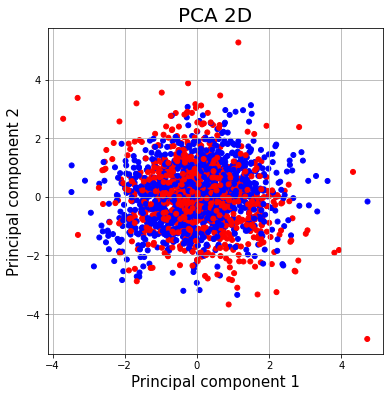

In [60]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('PCA 2D', fontsize=20)
ax.set_xlabel('Principal component 1', fontsize=15)
ax.set_ylabel('Principal component 2', fontsize=15)
ax.grid()

ax.scatter(water_pca[:, 0], water_pca[:, 1], c=np.array(["blue", "red"])[potability], s=25)

In [61]:
print(water_data_no_missing.columns)
pca.components_

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')


array([[-0.47404071, -0.21606914,  0.66225649, -0.06779952, -0.45863379,
        -0.01664511, -0.16382524, -0.04620069,  0.21406511],
       [-0.38863879, -0.62587007, -0.16821895,  0.2597866 ,  0.54146414,
        -0.16084655, -0.08868279, -0.04434396,  0.18048214]])

# k-means clustering

  0%|          | 0/5 [00:00<?, ?it/s]

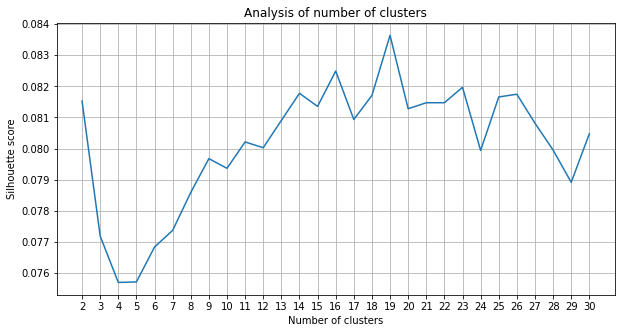

In [16]:
#depends on `water_data_standardised`

# K-means analysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm

def avg(A):
    return sum(A)/len(A)

# initial data and parameters
X = water_data_standardised
max_k = 30
rep = 5

k_range = range(2, max_k + 1)
scores = []
scores_table_rep = []

#repeat rep times
for i in tqdm(range(rep)):
    scores = []
    #k-means
    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels, metric='euclidean')
        scores.append((k, score))
    scores_table_rep.append(scores)
#avg of scores
scores_final = [[] for i in range(rep)]
scores = []

for i in k_range:
    avg_res = avg([scores_table_rep[k][i - 2][1] for k in range(rep)])
    scores.append((i, avg_res))

#plot
ax_x, ax_y = zip(*scores)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(k_range)
plt.grid()
plt.title("Analysis of number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.plot(ax_x, ax_y)

## Clustering dimensionally reduced data
PCA+k-Means

  0%|          | 0/5 [00:00<?, ?it/s]

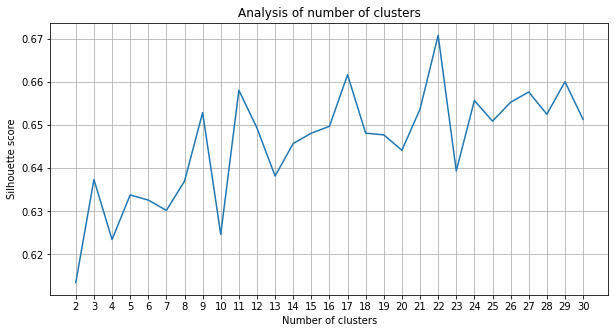

In [62]:
X=pd.DataFrame(water_pca)
#repeat rep times
for i in tqdm(range(rep)):
    scores = []
    #k-means
    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels, metric='euclidean')
        scores.append((k, score))
    scores_table_rep.append(scores)
#avg of scores
scores_final = [[] for i in range(rep)]
scores = []

for i in k_range:
    avg_res = avg([scores_table_rep[k][i - 2][1] for k in range(rep)])
    scores.append((i, avg_res))

#plot
ax_x, ax_y = zip(*scores)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(k_range)
plt.grid()
plt.title("Analysis of number of clusters for PCA")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.plot(ax_x, ax_y)

[44, 36] 0.55
[118, 82] 0.59
[30, 39] 0.43478260869565216
[103, 66] 0.6094674556213018
[39, 44] 0.46987951807228917
[39, 23] 0.6290322580645161
[22, 13] 0.6285714285714286
[121, 87] 0.5817307692307693
[41, 15] 0.7321428571428571
[21, 25] 0.45652173913043476
[54, 20] 0.7297297297297297
[31, 39] 0.44285714285714284
[97, 56] 0.6339869281045751
[100, 50] 0.6666666666666666
[73, 58] 0.5572519083969466
[72, 29] 0.7128712871287128
[74, 37] 0.6666666666666666
[11, 17] 0.39285714285714285
[11, 25] 0.3055555555555556
[2, 8] 0.2
[84, 39] 0.6829268292682927
[13, 3] 0.8125


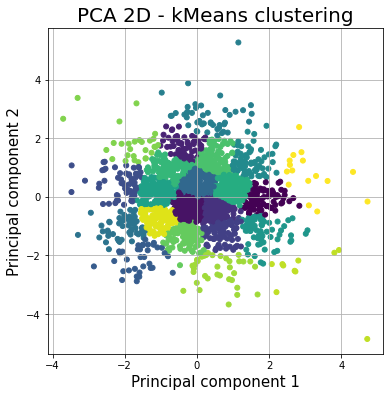

In [81]:
k = 22
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(X)
n = len(labels)
pot_list = list(potability)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('PCA 2D - kMeans clustering', fontsize=20)
ax.set_xlabel('Principal component 1', fontsize=15)
ax.set_ylabel('Principal component 2', fontsize=15)
ax.grid()

ax.scatter(water_pca[:, 0], water_pca[:, 1], c=[labels], s=25)

# [number of samples where potability=0, potability=1] in ith cluster
clusters = [[0, 0] for i in range(k)]
for i in range(n):
    clusters[labels[i]][pot_list[i]]+=1

for cluster in clusters:
    print(cluster, cluster[0]/sum(cluster)) #2nd arg - rate of negative examples in cluster


# kNN classifier

  0%|          | 0/5 [00:00<?, ?it/s]

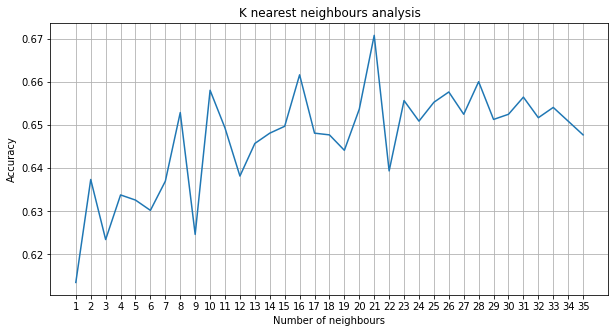

In [36]:
#depends on `water_no_missing`

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from tqdm.notebook import tqdm

def avg(A):
    return sum(A)/len(A)

#data
water_data_no_missing = water_no_missing.drop(["Potability"], axis=1)
water_data_standardised = StandardScaler().fit(water_data_no_missing).transform(water_data_no_missing)
water_data_standardised_df = pd.DataFrame(water_data_standardised)
water_data_standardised_df.columns = water_data_no_missing.columns
X = water_data_standardised_df
y = water_no_missing["Potability"]

#global parameters
max_k = 35
rep = 5

scores = []
scores_table_rep = []

#repetition loop
for i in tqdm(range(rep)):
    scores = []
    #loop of k-nn
    for j in range(1, max_k + 1):
        #divide data into training and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        #convert y values to categorical values
        lab = preprocessing.LabelEncoder()
        y_test = lab.fit_transform(y_test)
        y_train = lab.fit_transform(y_train)

        #k-nn
        clf = KNeighborsClassifier(n_neighbors=j)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append((i, accuracy))
    scores_table_rep.append(scores)

#avg of scores
scores_final = [[]for i in range(rep)]
scores = []
for i in range(1, max_k + 1):
    avg_res = avg([scores_table_rep[k][i - 1][1] for k in range(rep)])
    scores.append((i, avg_res))

#plot
ax_x, ax_y = zip(*scores)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(range(1, max_k + 1))
plt.grid()
plt.title("K nearest neighbours analysis")
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.plot(ax_x, ax_y)

## Analysis of confusion matrices

In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

n = len(y)

best_accuracy = 0
best_accuracy_k = 0
best_acc_c_matrix = []
best_accuracy_fpr = 1

best_false_positive_rate = 1
best_fpr_k = 0
best_fpr_c_matrix = []
best_fpr_accuracy = 0

max_k = 35
for k in range(1, max_k+1):
    kNN_classifier = KNeighborsClassifier(n_neighbors=k)
    new_predictions = cross_val_predict(kNN_classifier, X, y, cv=10)
    c_matrix = confusion_matrix(y, new_predictions)
    accuracy = (c_matrix[0][0]+c_matrix[1][1])/n
    false_positive_rate = c_matrix[0][1]/(c_matrix[0][1]+c_matrix[1][1])
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_accuracy_k = k
        best_acc_c_matrix = c_matrix
        best_accuracy_fpr = false_positive_rate

    if false_positive_rate < best_false_positive_rate:
        best_false_positive_rate = false_positive_rate
        best_fpr_k = k
        best_fpr_c_matrix = c_matrix
        best_fpr_accuracy = accuracy
    print("k =", k, "Accuracy:", accuracy)
    print(c_matrix)
    print("==============\n")

print("Highest accuracy configuraiton:")
print("Accuracy:", best_accuracy)
print("False positive rate:", best_accuracy_fpr)
print("k:", best_accuracy_k)
print(best_acc_c_matrix)
print("=======")
print("Safest recommendations configuration:")
print("Accuracy:", best_fpr_accuracy)
print("False positive rate:", best_false_positive_rate)
print("k:", best_fpr_k)
print(best_fpr_c_matrix)


k = 1 Accuracy: 0.5882645450024864
[[827 373]
 [455 356]]

k = 2 Accuracy: 0.6195922426653406
[[1067  133]
 [ 632  179]]

k = 3 Accuracy: 0.6136250621581303
[[891 309]
 [468 343]]

k = 4 Accuracy: 0.6151168572849328
[[1047  153]
 [ 621  190]]

k = 5 Accuracy: 0.6071606166086524
[[912 288]
 [502 309]]

k = 6 Accuracy: 0.6176031824962706
[[1046  154]
 [ 615  196]]

k = 7 Accuracy: 0.6156141223272004
[[945 255]
 [518 293]]

k = 8 Accuracy: 0.6215813028344107
[[1047  153]
 [ 608  203]]

k = 9 Accuracy: 0.6270512182993535
[[968 232]
 [518 293]]

k = 10 Accuracy: 0.6280457483838886
[[1051  149]
 [ 599  212]]

k = 11 Accuracy: 0.6320238687220289
[[995 205]
 [535 276]]

k = 12 Accuracy: 0.6300348085529587
[[1068  132]
 [ 612  199]]

k = 13 Accuracy: 0.6369965191447041
[[1023  177]
 [ 553  258]]

k = 14 Accuracy: 0.6310293386374938
[[1075  125]
 [ 617  194]]

k = 15 Accuracy: 0.6300348085529587
[[1027  173]
 [ 571  240]]

k = 16 Accuracy: 0.635007458975634
[[1084  116]
 [ 618  193]]

k = 17 Acc